In [27]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import random
from skimage.filters import (threshold_otsu, threshold_niblack,threshold_sauvola)
from sklearn.feature_extraction import image
import numpy as np

random.seed(10)

# Exploratory

In [28]:
#TODO introduce a variabl n to increase speed while debugging
def get_raw_data(path):
    p = Path(path).glob('**/*.jpg')
    files = [x for x in p if x.is_file()]
    #return files
    imgs = {}
    for file in files:
        imgs[str(file)] = cv2.imread(str(file))
    return imgs

In [29]:
path = '/Users/beantown/PycharmProjects/master-thesis/data/raw'
files = get_raw_data(path)

In [30]:
def get_patches(files,patches_per_file=1, single = False):
    patch_files = {}
    for file, img in files.items(): 
        patches = image.extract_patches_2d(img, (500, 500), max_patches=patches_per_file)            
        patch_files[file] = patches
        if single:
            return img, patches
    return patch_files

In [31]:
original_img, patches= get_patches(files,patches_per_file=4, single=True)

In [32]:
original_img_dic = {'original':original_img}
patch_1_dic = {'Patch_1':patches[0]}
patch_2_dic = {'Patch_2':patches[1]}
patch_3_dic = {'Patch_3':patches[2]}
patch_4_dic = {'Patch_4':patches[3]}

In [33]:
def show_example(files, keep_size=True, n=1, hide_spines=False, gray=False, add_to_title=None):
    for i in range(n):
        dpi = 80

        key, value = random.choice(list(files.items()))
        if not gray:
            im_data = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
        else:
            im_data = value.copy()
            
        title = str(key).split('/')[-1].split('.')[0]
        if add_to_title != None:
            title = add_to_title + ': ' + title


        if keep_size:
            if gray:
                height, width = im_data.shape
            else:
                height, width, _ = im_data.shape

            # What size does the figure need to be in inches to fit the image?
            figsize = width / float(dpi), height / float(dpi)

            # Create a figure of the right size with one axes that takes up the full figure
            fig = plt.figure(figsize=figsize)
            ax = fig.add_axes([0, 0, 1, 1])

            # Hide spines, ticks, etc.
            #ax.axis('off')
            if hide_spines:
                ax.axis('off')
            else:
                ax.tick_params(axis='both', which='major', labelsize=40)
                ax.tick_params(axis='both', which='minor', labelsize=30)
            
            ax.set_title(title, pad=30, fontsize=50)

            # Display the image.
            if gray:
                ax.imshow(im_data, cmap='gray')
            else:
                ax.imshow(im_data)
        else:
            plt.title(title, pad=20, fontsize=20)
            if hide_spines:
                plt.axis('off')
            if gray:
                plt.imshow(im_data, cmap='gray')
            else:
                plt.imshow(im_data)

        plt.show()    

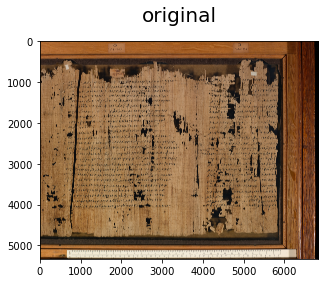

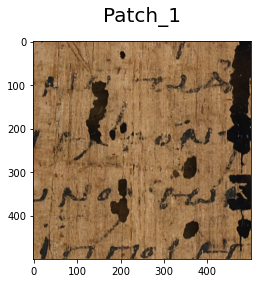

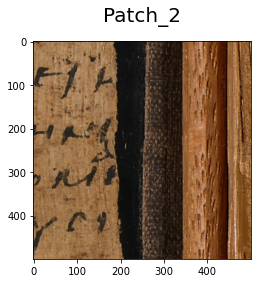

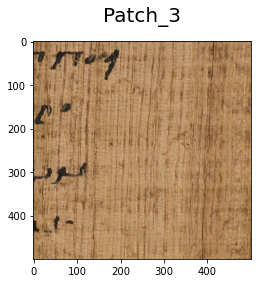

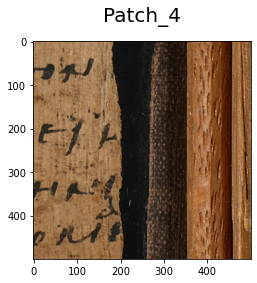

In [34]:
show_example(original_img_dic, keep_size=False, n=1,  hide_spines=False)
show_example(patch_1_dic, keep_size=False, n=1,  hide_spines=False)
show_example(patch_2_dic, keep_size=False, n=1,  hide_spines=False)
show_example(patch_3_dic, keep_size=False, n=1,  hide_spines=False)
show_example(patch_4_dic, keep_size=False, n=1,  hide_spines=False)

In [ ]:
#key, value = random.choice(list(files.items()))
#test_file = {key:value}
#show_example(test_file, keep_size=True, n=1,  hide_spines=False)

In [36]:
def get_forground(files, method='otsu'):
    # use a specific method if nothing else is given or it uses global theshold with otsu as default
    forground_files = {}
    window_size = 25
    if method == 'niblack':
        for key, value in files.items():
            # Prprocessing
            image = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
            #blurred = cv2.GaussianBlur(im_gray, (7, 7), 0)
            thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
            binary_niblack = image > thresh_niblack
            forground_files[key] = binary_niblack
            
    elif method == 'sauvola':
        for key, value in files.items():
            # Prprocessing
            image = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
            #blurred = cv2.GaussianBlur(im_gray, (7, 7), 0)
            thresh_sauvola = threshold_sauvola(image, window_size=window_size)
            binary_sauvola = image > thresh_sauvola
            forground_files[key] = binary_sauvola
    
            
    else:
         for key, value in files.items():
            # Prprocessing
            image = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
            #blurred = cv2.GaussianBlur(im_gray, (7, 7), 0)
            binary_global = image > threshold_otsu(image)
            forground_files[key] = binary_global
            
    return forground_files

In [37]:
otsu_files = get_forground(patch_1_dic)
#sauvola_files = get_forground(files, method = 'sauvola')
#niblack_files = get_forground(files, method = 'niblack')

In [41]:
otsu_files

{'Patch_1': array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [38]:
otsu_img = {'otsu patch 1': otsu_files}
#sauvola_img = {key: sauvola_files[key]}
#niblack_img =  {key: niblack_files[key]}

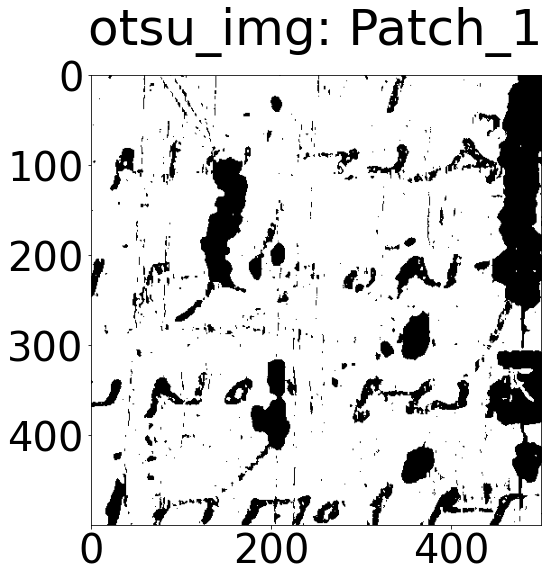

In [40]:
show_example(otsu_files, keep_size=True, n=1,  hide_spines=False, gray=True, add_to_title='otsu_img')
#show_example(sauvola_img, keep_size=True, n=1,  hide_spines=False, gray=True, add_to_title='sauvola_img')
#show_example(niblack_img, keep_size=True, n=1,  hide_spines=False, gray=True, add_to_title='niblack_img')

In [ ]:
from skimage.restoration import inpaint

image_result = inpaint.inpaint_biharmonic(patch_1_dic['Patch_1'], otsu_files['Patch_1'], multichannel=True)